- データの観測
- 適当に試す

## 初期設定

In [1]:
import pickle
import glob
import matplotlib.pyplot as plt
import numpy as np
import itertools
import pandas as pd
import datetime
import math

from visualize import visualization as my_VS
from select_datasets import Select_datasets as my_SD

In [2]:
path = "/data6/2207_XRISM_PFT_TC7/db/temp"
tem_pklfiles = glob.glob(path+"/**.pkl")
d_tempfile = tem_pklfiles[0]

with open(d_tempfile, 'rb') as tempf:
    List_temp_tempfile_ = pickle.load(tempf)
    
[i for i in List_temp_tempfile_.columns if "WAMC" in i]
#[tem_pklfiles.index(i) for i in tem_pklfiles if "202208" in i]
#List_temp_tempfile_.index.to_numpy()

['WAMC_TEMP0',
 'WAMC_TEMP1',
 'WAMC_TEMP2',
 'WAMC_TEMP3',
 'WAMC_TEMP4',
 'WAMC_CT0',
 'WAMC_CT1']

In [3]:
target_tempcsi = ["CAMC_CT0","CAMC_CT1","HS1_GET1","HS2_GET1"]
target_ADRC = ['ADRC_SEQ1_EXEC_LINE','ADRC_WAMC_MAG_DRV_V','ADRC_CAMC_MAG_DRV_V','ADRC_WAMC_MAG_SEN_V','ADRC_CAMC_MAG_SEN_V','ADRC_CAMC_MAG_HI_I','ADRC_CAMC_MAG_LO_I']

In [4]:
path = "/data7/2207_XRISM_PFT_TC7/db/coolers"
tem_coolers = glob.glob(path+"/**.pkl")
d_coolers = tem_coolers[0]

with open(d_coolers, 'rb') as tempf:
    List_temp_coolers = pickle.load(tempf)
#[i for i in List_temp_coolers.columns if "ADRC_CAMC_MAG" in i]

- Ctrlってなに？
- S1_mag

- DA?

- 'ADRC_CAMC_MAG_SEN_V'to 'ADRC_CAMC_MAG_LO_I_CAL'

## データゲット　Temp

In [5]:
path = "/data7/2207_XRISM_PFT_TC7/db/temp"
tem_pklfiles = glob.glob(path+"/**.pkl")

List_temp_tempfile = []
List_time_tempfile = []

for d_tempfile in tem_pklfiles:
    with open(d_tempfile, 'rb') as tempf:
        d = pickle.load(tempf)
        if len(List_temp_tempfile) != 0:
            List_temp_tempfile = List_temp_tempfile+list(itertools.chain.from_iterable(np.array(d[["CAMC_CT0"]])))
            List_time_tempfile = List_time_tempfile+d.index.to_list()
        else:
            List_temp_tempfile = list(itertools.chain.from_iterable(np.array(d[["CAMC_CT0"]])))
            List_time_tempfile = d.index.to_list()

In [6]:
df_tempfile = pd.DataFrame({
    "time":List_time_tempfile,
    "temp":List_temp_tempfile
})

df_tempfile = df_tempfile.sort_values("time")
df_tempfile.index = range(len(df_tempfile))

In [7]:
List_time_tempfile = np.array(df_tempfile["time"])
List_temp_tempfile = np.array(df_tempfile["temp"])

(0.0, 2000.0)

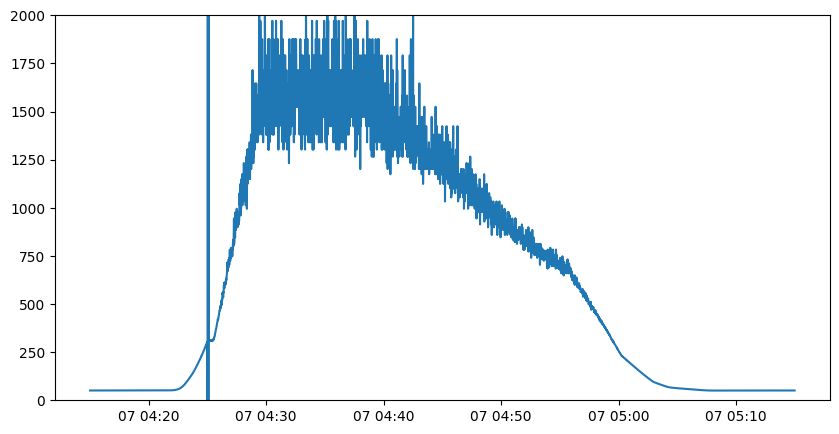

In [13]:
time_start = np.datetime64('2022-08-07T04:15:00.000000000')
time_stop = np.datetime64('2022-08-07T05:15:00.000000000')

index_range = ((List_time_tempfile > time_start) & (List_time_tempfile < time_stop))

List_time_tempfile_short = List_time_tempfile[index_range]
List_temp_tempfile_short = List_temp_tempfile[index_range]

fig,ax = plt.subplots(1,1,figsize=(10,5))

ax.plot(List_time_tempfile_short,List_temp_tempfile_short)
ax.set_ylim(0,2000)

(-10.0, 20.0)

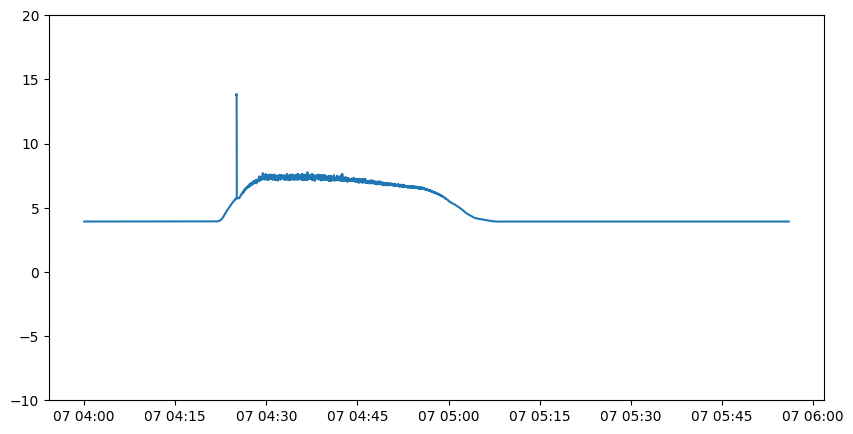

In [8]:
time_start = np.datetime64('2022-08-07T04:00:00.000000000')
time_stop = np.datetime64('2022-08-07T06:00:00.000000000')

index_range = ((List_time_tempfile > time_start) & (List_time_tempfile < time_stop))

List_time_tempfile_short = List_time_tempfile[index_range]
List_temp_tempfile_short = np.log(List_temp_tempfile[index_range])

fig,ax = plt.subplots(1,1,figsize=(10,5))

ax.plot(List_time_tempfile_short,List_temp_tempfile_short)
ax.set_ylim(-10,20)

## データゲット　　WAMC

In [9]:
path = "/data7/2207_XRISM_PFT_TC7/db/temp"
tem_pklfiles = glob.glob(path+"/**.pkl")

List_temp_wamcfile = []
List_time_wamcfile = []

for d_tempfile in tem_pklfiles:
    with open(d_tempfile, 'rb') as tempf:
        d = pickle.load(tempf)
        if len(List_temp_wamcfile) != 0:
            List_temp_wamcfile = List_temp_wamcfile+list(itertools.chain.from_iterable(np.array(d[['WAMC_CT1']])))
            List_time_wamcfile = List_time_wamcfile+d.index.to_list()
        else:
            List_temp_wamcfile = list(itertools.chain.from_iterable(np.array(d[['WAMC_CT1']])))
            List_time_wamcfile = d.index.to_list()

In [10]:
df_wamcfile = pd.DataFrame({
    "time":List_time_wamcfile,
    "temp":List_temp_wamcfile
})

df_wamcfile = df_wamcfile.sort_values("time")
df_wamcfile.index = range(len(df_wamcfile))

In [11]:
List_time_wamcfile = np.array(df_wamcfile["time"])
List_temp_wamcfile = np.array(df_wamcfile["temp"])

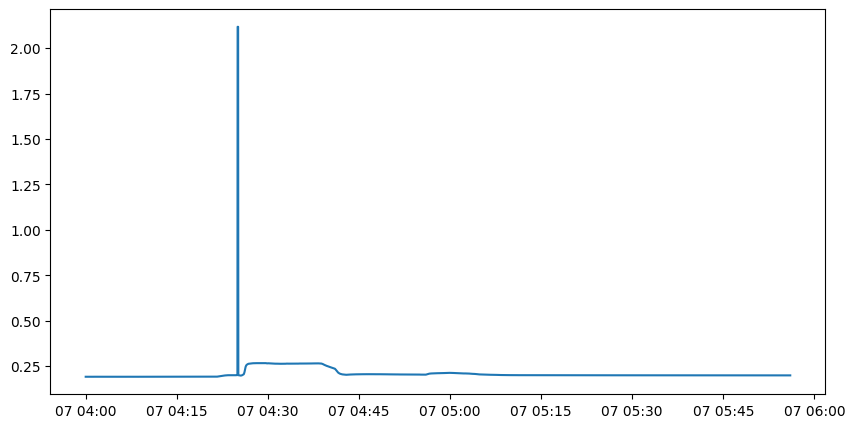

In [12]:
time_start = np.datetime64('2022-08-07T04:00:00.000000000')
time_stop = np.datetime64('2022-08-07T06:00:00.000000000')

index_range = ((List_time_wamcfile > time_start) & (List_time_wamcfile < time_stop))

List_time_wamcfile_short = List_time_wamcfile[index_range]
List_temp_wamcfile_short = np.log(List_temp_wamcfile[index_range])

fig,ax = plt.subplots(1,1,figsize=(10,5))

ax.plot(List_time_wamcfile_short,List_temp_wamcfile_short)
#ax.set_ylim(-10,20)

- tempと同様に謎の高温がある
- 実際のADRRecycleより早くピークが収まる

## データゲット　ADRC

In [9]:
path = "/data7/2207_XRISM_PFT_TC7/db/coolers"
adr_pklfiles = glob.glob(path+"/**.pkl")

List_adr_adrfile = []
List_time_adrfile = []

for d_adrfile in adr_pklfiles:
    with open(d_adrfile, 'rb') as adrf:
        d = pickle.load(adrf)
        if len(List_time_adrfile) != 0:
            List_adr_adrfile = List_adr_adrfile+list(itertools.chain.from_iterable(np.array(d[['ADRC_CAMC_MAG_HI_I']])))
            List_time_adrfile = List_time_adrfile+d.index.to_list()
        else:
            List_adr_adrfile = list(itertools.chain.from_iterable(np.array(d[['ADRC_CAMC_MAG_HI_I']])))
            List_time_adrfile = d.index.to_list()

In [10]:
df_adrfile = pd.DataFrame({
    "time":List_time_adrfile,
    "adr":List_adr_adrfile
})

df_adrfile = df_adrfile.sort_values("time")
df_adrfile.index = range(len(df_adrfile))

In [11]:
List_time_adrfile = np.array(df_adrfile["time"])
List_adr_adrfile = np.array(df_adrfile["adr"])

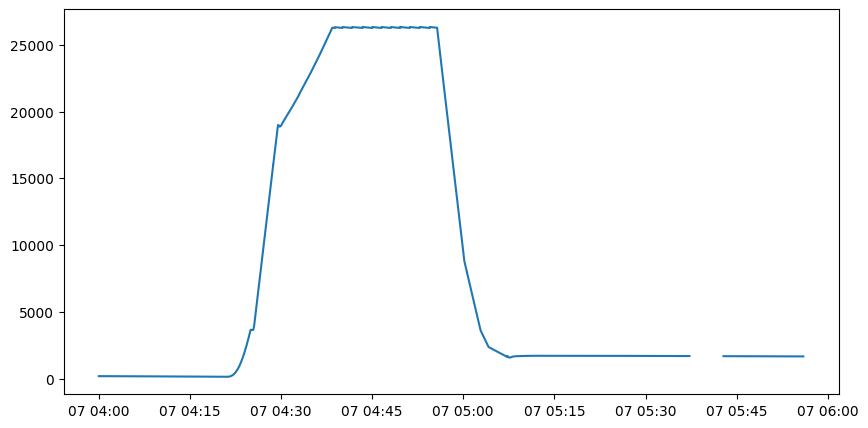

In [12]:
time_start = np.datetime64('2022-08-07T04:00:00.000000000')
time_stop = np.datetime64('2022-08-07T06:00:00.000000000')

index_range = ((List_time_adrfile > time_start) & (List_time_adrfile < time_stop))

List_time_adrfile_short = List_time_adrfile[index_range]
List_adr_adrfile_short = List_adr_adrfile[index_range]

fig,ax = plt.subplots(1,1,figsize=(10,5))

ax.plot(List_time_adrfile_short,List_adr_adrfile_short)
#ax.set_ylim(-10,2000)

## 変化点検知

In [14]:
import changefinder

In [15]:
cf = changefinder.ChangeFinder(r=0.1,order=10,smooth=100)
result = np.empty(len(List_temp_tempfile_short))

for i,d in enumerate(List_temp_tempfile_short):
    result[i] = cf.update(d)

/usr/local/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


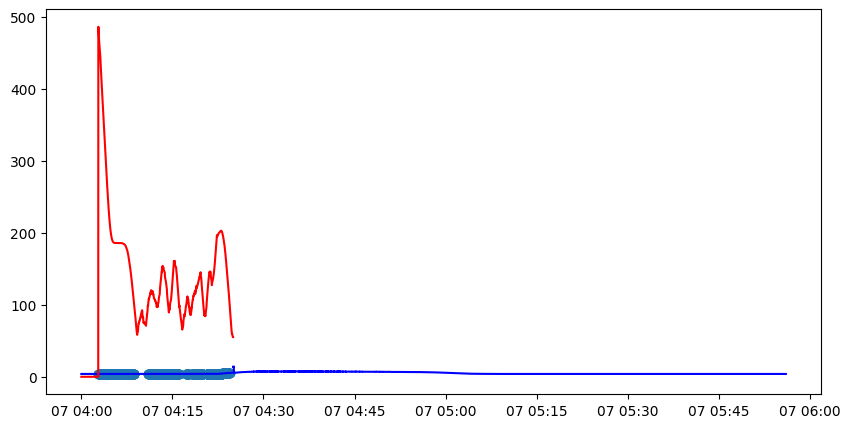

In [16]:
fig,ax = plt.subplots(1,1,figsize=(10,5))

ax.plot(List_time_tempfile_short,List_temp_tempfile_short,color="blue")
ax.plot(List_time_tempfile_short,result,color="red")
ax.scatter(List_time_tempfile_short[result>100],List_temp_tempfile_short[result>100])

#ax.set_ylim(-10,20)

## 変化点検知　ADRC

In [52]:
cf = changefinder.ChangeFinder(r=0.1,order=10,smooth=100)
result = np.empty(len(List_adr_adrfile_short))

for i,d in enumerate(List_adr_adrfile_short):
    a = cf.update(d)
    if math.isnan(a):
        result[i] = 100
    else:
        result[i] = cf.update(d)
    

/home/kashiwazaki/.local/lib/python3.7/site-packages/changefinder/__init__.py:24: RuntimeWarning: invalid value encountered in double_scalars
  lam /= e[k]


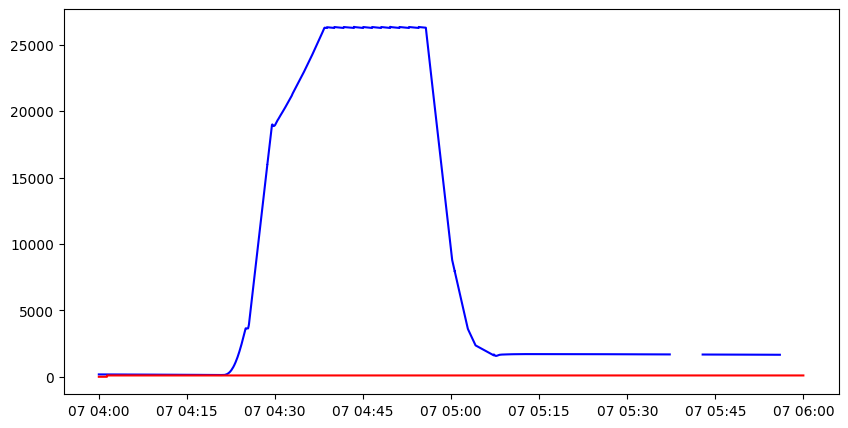

In [54]:
fig,ax = plt.subplots(1,1,figsize=(10,5))

ax.plot(List_time_adrfile_short,List_adr_adrfile_short,color="blue")
ax.plot(List_time_adrfile_short,result,color="red")
#ax.scatter(List_time_adrfile_short[result>150],List_adr_adrfile_short[result>150])

#ax.set_ylim(-10,20)

## ベイズ

In [53]:
result

array([  0.,   0.,   0., ..., 100., 100., 100.])

In [19]:
import Beith 

In [20]:
test_signal = np.array(List_temp_tempfile_short,dtype=np.float64)

In [21]:
# ハザード関数
hazard_func = lambda r: Beith.constant_hazard(r, _lambda=300)
# 確率密度関数としてスチューデントのT分布を用いる
distribution = Beith.StudentT()

In [22]:
# 予測分布の確率密度関数の初期化
distribution.reset_params()

bcp = Beith.BayesianOnlineChangePointDetection(hazard_func, distribution)
bcp.reset_params()

maxes = np.empty(test_signal.shape)
beliefs = []
# 例では連長の初期状態が必ず0になり、信念は1.0になることがわかっているため
# 信念の初期状態を格納しておく
beliefs.append(bcp.beliefs[:,0])

# 推定連長と信念の計算
for i, d in enumerate(test_signal):
    try:
        maxes[i], current_belief = bcp.update(d)
        beliefs.append(current_belief)
    except:
        pass

/usr/local/conda/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1871: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0)
/usr/local/conda/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1872: RuntimeWarning: invalid value encountered in greater
  cond1 = self._support_mask(x, *args) & (scale > 0)


In [23]:
max_len = beliefs[-1].shape[0]
belief_matrix = np.zeros((max_len-1, max_len-1))

for i, belief in enumerate(beliefs):
    belief_matrix[:i+1, i] = belief[:-1]

/usr/local/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/conda/lib/python3.7/site-packages/matplotlib/axes/_base.py:2921: RuntimeWarning: overflow encountered in double_scalars
  delta = (x1t - x0t) * margin
/usr/local/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()


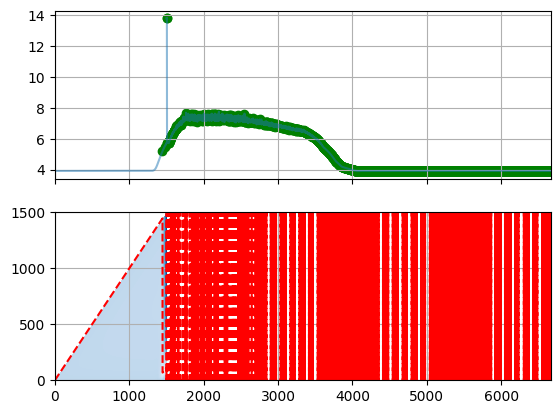

In [24]:
fig, ax = plt.subplots(nrows = 2, sharex = True)

ax[0].plot(test_signal, alpha=0.5, label="observation")
ax[1].imshow(-np.log(belief_matrix), interpolation='none', aspect='auto',
               origin='lower', cmap=plt.cm.Blues, label="belief")
ax[1].plot(maxes, '--', color='r', label="run length")
ax[1].set_xlim([0, len(test_signal)])
ax[1].set_ylim([0, ax[1].get_ylim()[1]])
ax[0].grid()
ax[1].grid()
index_changes = np.where(np.diff(maxes)<0)[0]
ax[0].scatter(index_changes, test_signal[index_changes], c='green', label="change point")
#ax[0].set_ylim(-10,1000)

## ADRC beith

In [25]:
import Beith 

In [59]:
test_signal = np.array(List_adr_adrfile_short,dtype=np.float64)

# ハザード関数
hazard_func = lambda r: Beith.constant_hazard(r, _lambda=100)
# 確率密度関数としてスチューデントのT分布を用いる
distribution = Beith.StudentT()

# 予測分布の確率密度関数の初期化
distribution.reset_params()

bcp = Beith.BayesianOnlineChangePointDetection(hazard_func, distribution)
bcp.reset_params()

maxes = np.empty(test_signal.shape)
beliefs = []
# 例では連長の初期状態が必ず0になり、信念は1.0になることがわかっているため
# 信念の初期状態を格納しておく
beliefs.append(bcp.beliefs[:,0])

# 推定連長と信念の計算
for i, d in enumerate(test_signal):
    try:
        maxes[i], current_belief = bcp.update(d)
        beliefs.append(current_belief)
    except:
        pass
    
max_len = beliefs[-1].shape[0]
belief_matrix = np.zeros((max_len-1, max_len-1))

for i, belief in enumerate(beliefs):
    belief_matrix[:i+1, i] = belief[:-1]

/usr/local/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


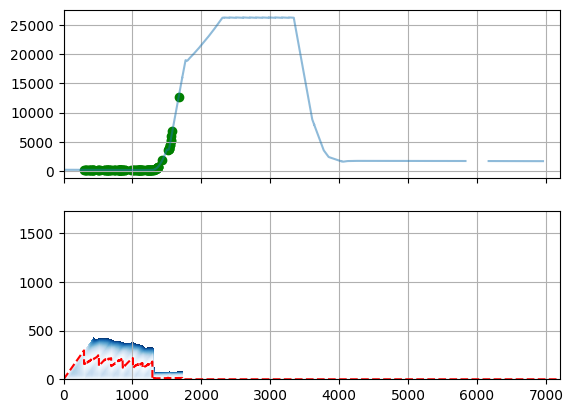

In [60]:
fig, ax = plt.subplots(nrows = 2, sharex = True)

ax[0].plot(test_signal, alpha=0.5, label="observation")
ax[1].imshow(-np.log(belief_matrix), interpolation='none', aspect='auto',
               origin='lower', cmap=plt.cm.Blues, label="belief")
ax[1].plot(maxes, '--', color='r', label="run length")
ax[1].set_xlim([0, len(test_signal)])
ax[1].set_ylim([0, ax[1].get_ylim()[1]])
ax[0].grid()
ax[1].grid()
index_changes = np.where(np.diff(maxes)<0)[0]
ax[0].scatter(index_changes, test_signal[index_changes], c='green', label="change point")
#ax[0].set_ylim(-10,1000)

### 実際にやってみる

In [ ]:
lim = 500

start_list = np.array(range(0,len(List_temp_tempfile),lim))
stop_list = start_list+lim+100

for start,stop in zip(start_list[:10],stop_list[:10]):

    test_signal = np.array(List_temp_tempfile[start:stop],dtype=np.float64)

    # ハザード関数
    hazard_func = lambda r: Beith.constant_hazard(r, _lambda=300)

    # 確率密度関数としてスチューデントのT分布を用いる
    distribution = Beith.StudentT()

    # 予測分布の確率密度関数の初期化
    distribution.reset_params()

    bcp = Beith.BayesianOnlineChangePointDetection(hazard_func, distribution)
    bcp.reset_params()

    maxes = np.empty(test_signal.shape)
    beliefs = []                                         
    # 例では連長の初期状態が必ず0になり、信念は1.0になることがわかっているため
    # 信念の初期状態を格納しておく
    beliefs.append(bcp.beliefs[:,0])

    # 推定連長と信念の計算
    for i, d in enumerate(test_signal):
        try:
            maxes[i], current_belief = bcp.update(d)
            beliefs.append(current_belief)
        except:
            pass
    index_changes = np.where(np.diff(maxes)<0)[0]                                       
    print(f"{start}:{index_changes}")
